In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [47]:
%matplotlib inline

In [48]:
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(4,5)}, 
    style="white"
)

## Analysis of Patients CSV

In [49]:
patients = pd.read_csv("PATIENTS.csv")
patients.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [52]:
print(f"Total Patients: {len(patients)}")
print(f"Number of Males: {len(patients[patients['GENDER'] == 'M'])}")
print(f"Number of Females: {len(patients[patients['GENDER'] == 'F'])}")

Total Patients: 46520
Number of Males: 26121
Number of Females: 20399


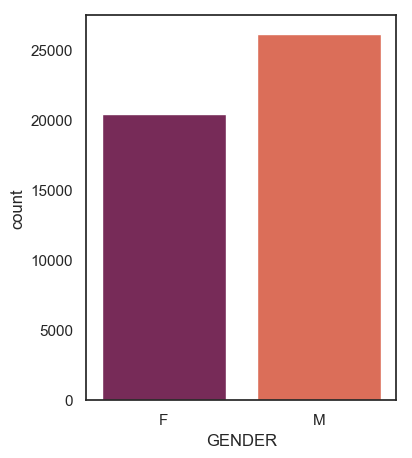

In [50]:
sns.countplot(patients['GENDER'], palette="rocket")
plt.show()

## Analysis of Noteevents CSV

(This dataset is quite large and would take time to load.)

In [53]:
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(10,6)}, 
    style="white"
)

In [18]:
noteevents = pd.read_csv('NOTEEVENTS.csv')
noteevents.head()

/Users/harnoor_dhingra/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [54]:
noteevents_original = noteevents

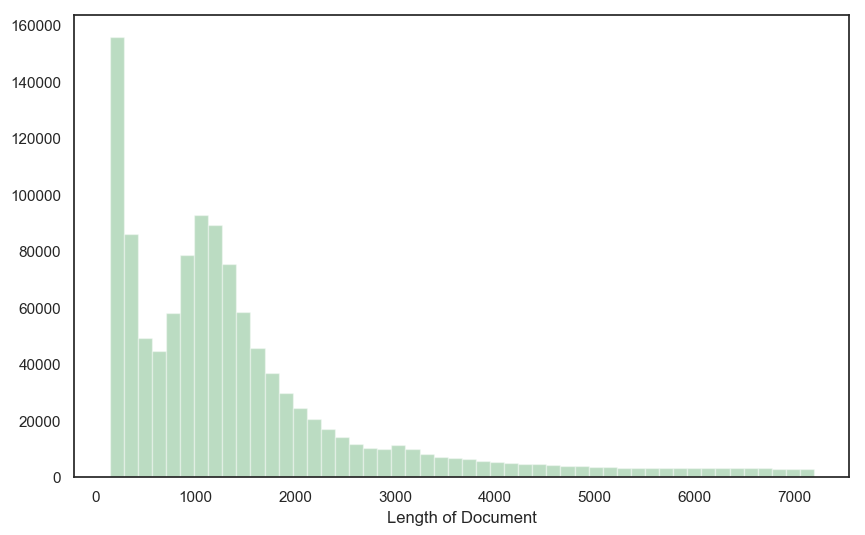

In [58]:
lns = [len(str(x)) for x in noteevents['TEXT']]
sns.distplot(lns, kde=False, axlabel='Length of Document', color = 'g')
plt.show()

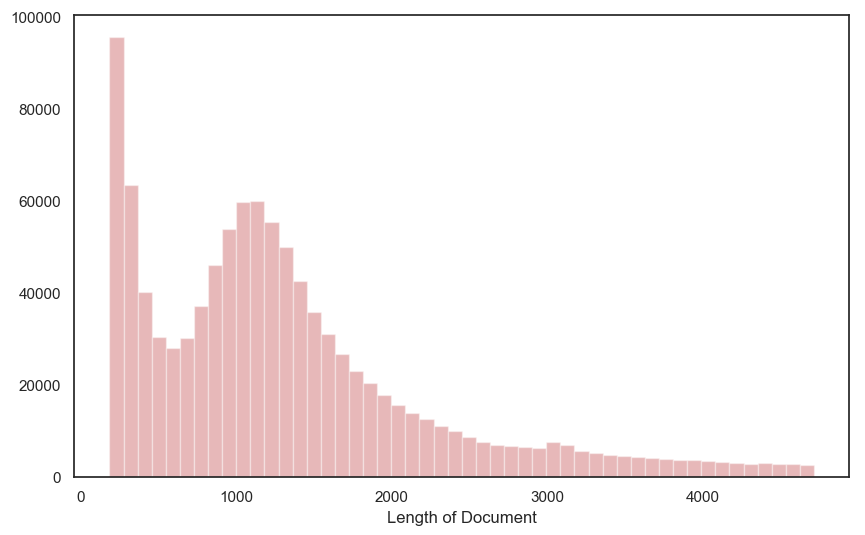

In [63]:
# Sort lengths
lns.sort()
# Take 5% as the removal size
rm_size = int(len(lns) / 100) * 5

# Now plot with removal of most/least frequent
sns.distplot(lns[rm_size:-rm_size], kde=False, axlabel='Length of Document', color = 'r')
plt.show()

### Preprocessing based on length of documents

In [64]:
# Preprocessing based on the length of documents
min_ln = max(lns[0:rm_size])
max_ln = min(lns[-rm_size:])

noteevents = noteevents[[True if len(str(x)) > min_ln and len(str(x)) < max_ln else False for x in noteevents['TEXT']]]
noteevents.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT,CREATE_YEAR
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...,2151
12,223,5350,169684.0,2143-04-30,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2143-4-25**] Discharge...,2143
13,224,5350,169684.0,2143-04-30,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2143-4-25**] Discharge...,2143
34,245,710,114242.0,2182-02-28,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2182-2-18**] Dischar...,2182
42,189,17483,189331.0,2147-07-01,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2147-6-24**] Discharge...,2147


In [65]:
print(f"After cleaning : {len(noteevents)}")
print(f"The original: {len(noteevents_original)}")

After cleaning : 1033157
The original: 1148653


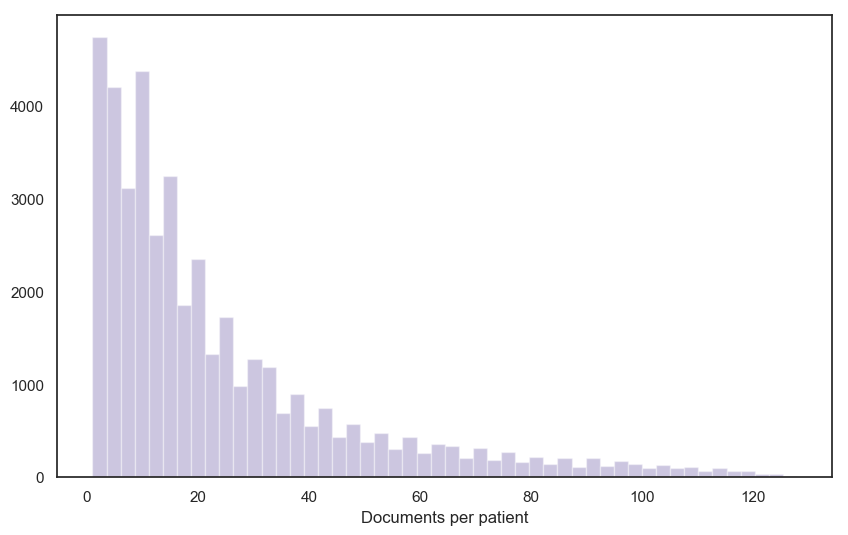

In [80]:
# Number of Documents Per Patient
sns.distplot(noteevents['SUBJECT_ID'].value_counts().values, kde=False, axlabel='Documents per patient', color = 'm')
plt.show()

In [81]:
# Cleaning the data.
# Removing the outliers
docs_per_pt = noteevents['SUBJECT_ID'].value_counts()
docs_per_pt_vals = docs_per_pt.values
docs_per_pt_vals.sort()

rm_size = int(len(docs_per_pt_vals) / 100) * 1
min_ln = max(docs_per_pt_vals[0:rm_size])
max_ln = min(docs_per_pt_vals[-rm_size:])

keep_subject_id = set([k for k, v in docs_per_pt.iteritems() if v > min_ln and v < max_ln])
noteevents = noteevents[[True if subject_id in keep_subject_id else False 
                  for subject_id in noteevents['SUBJECT_ID'].values]]
noteevents.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT,CREATE_YEAR
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...,2151
12,223,5350,169684.0,2143-04-30,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2143-4-25**] Discharge...,2143
13,224,5350,169684.0,2143-04-30,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2143-4-25**] Discharge...,2143
34,245,710,114242.0,2182-02-28,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2182-2-18**] Dischar...,2182
42,189,17483,189331.0,2147-07-01,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2147-6-24**] Discharge...,2147


In [82]:
print(f"After cleaning : {len(noteevents)}")
print(f"The original: {len(noteevents_original)}")

After cleaning : 764752
The original: 1148653


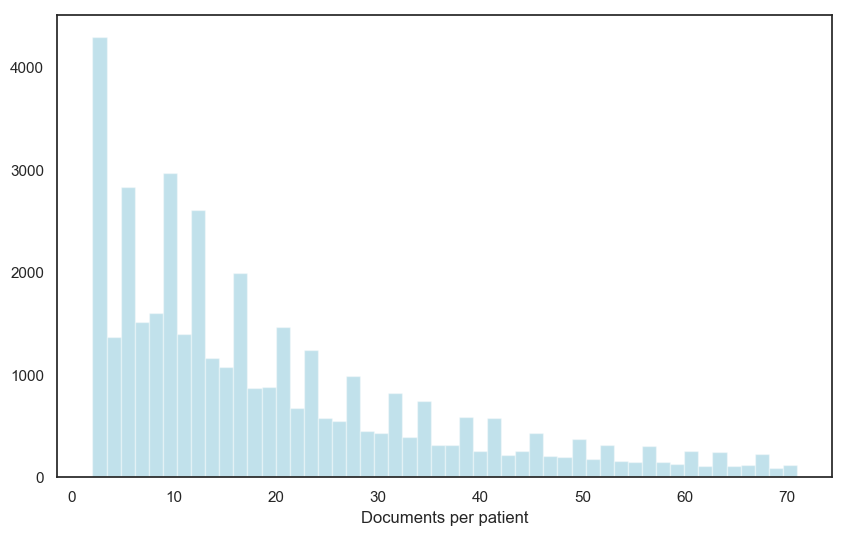

In [87]:
sns.distplot(noteevents['SUBJECT_ID'].value_counts().values, kde=False, axlabel='Documents per patient', color = 'c')
plt.show()

### There are different sources for the documesnt, we'll plot that also

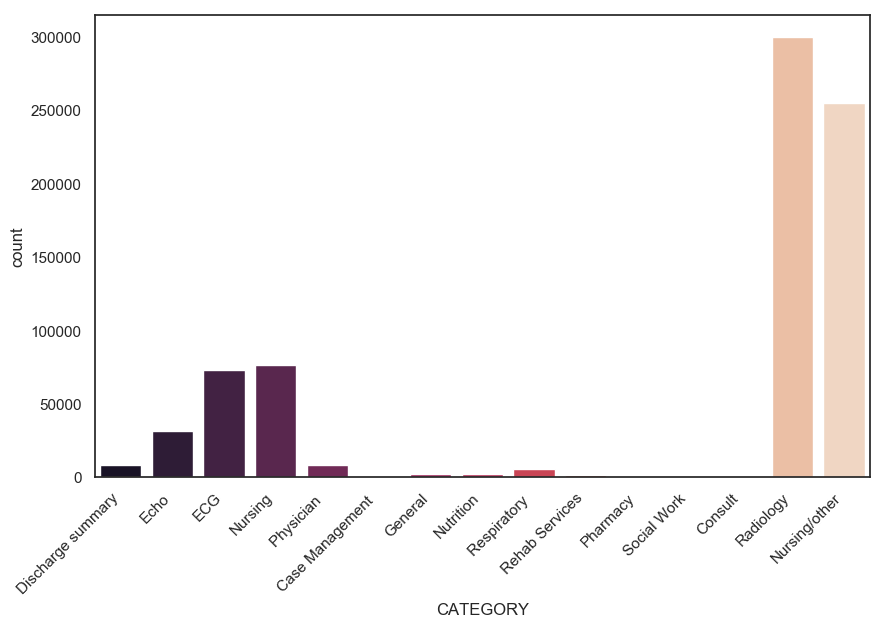

In [88]:
plot = sns.countplot(noteevents['CATEGORY'], palette="rocket")
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Analysis Based on the Age of Patients

In [96]:
noteevents['CHARTDATE'] = pd.to_datetime(noteevents['CHARTDATE'])
patients['DOB'] = pd.to_datetime(patients['DOB'])
# Add a year column to the dataset
noteevents['CREATE_YEAR'] = pd.DatetimeIndex(noteevents['CHARTDATE']).year
patients['DOB_YEAR'] = pd.DatetimeIndex(patients['DOB']).year

In [97]:
# Merge the datasets into one
pt_notes = noteevents.merge(patients, on='SUBJECT_ID', how='left')

In [98]:
pt_notes.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT,CREATE_YEAR,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,DOB_YEAR
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...,2151,21265,F,2064-08-20,NaN,NaN,NaN,0,2064
1,223,5350,169684.0,2143-04-30,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2143-4-25**] Discharge...,2143,5069,M,2076-08-18,2151-05-03 00:00:00,NaN,2151-05-03 00:00:00,1,2076
2,224,5350,169684.0,2143-04-30,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2143-4-25**] Discharge...,2143,5069,M,2076-08-18,2151-05-03 00:00:00,NaN,2151-05-03 00:00:00,1,2076
3,245,710,114242.0,2182-02-28,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2182-2-18**] Dischar...,2182,668,F,2109-08-28,2182-02-28 00:00:00,2182-02-28 00:00:00,2182-02-28 00:00:00,1,2109
4,189,17483,189331.0,2147-07-01,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2147-6-24**] Discharge...,2147,16534,F,2063-05-04,2147-07-01 00:00:00,2147-07-01 00:00:00,NaN,1,2063


In [99]:
pt_notes['AGE_YEAR'] = pt_notes['CREATE_YEAR'] - pt_notes['DOB_YEAR']

In [100]:
# Remove patients older than 89 and younger than 16
pt_notes = pt_notes[pt_notes['AGE_YEAR'] >= 16]
pt_notes = pt_notes[pt_notes['AGE_YEAR'] <= 89]

In [101]:
print("Number of patients with only one document: " + str(sum(pt_notes['SUBJECT_ID'].value_counts().values == 1)))
# Remove it there are any
remove_subject = set([k for k, v in pt_notes['SUBJECT_ID'].value_counts().iteritems() if v == 1])
pt_notes = pt_notes[~pt_notes.SUBJECT_ID.isin(remove_subject)]
print("After removal: " + str(sum(pt_notes['SUBJECT_ID'].value_counts().values == 1)))

Number of patients with only one document: 2
After removal: 0


In [102]:
pt_notes.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,...,CREATE_YEAR,ROW_ID_y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,DOB_YEAR,AGE_YEAR
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,...,2151,21265,F,2064-08-20,NaN,NaN,NaN,0,2064,87
1,223,5350,169684.0,2143-04-30,NaN,NaN,Discharge summary,Report,NaN,NaN,...,2143,5069,M,2076-08-18,2151-05-03 00:00:00,NaN,2151-05-03 00:00:00,1,2076,67
2,224,5350,169684.0,2143-04-30,NaN,NaN,Discharge summary,Report,NaN,NaN,...,2143,5069,M,2076-08-18,2151-05-03 00:00:00,NaN,2151-05-03 00:00:00,1,2076,67
3,245,710,114242.0,2182-02-28,NaN,NaN,Discharge summary,Report,NaN,NaN,...,2182,668,F,2109-08-28,2182-02-28 00:00:00,2182-02-28 00:00:00,2182-02-28 00:00:00,1,2109,73
4,189,17483,189331.0,2147-07-01,NaN,NaN,Discharge summary,Report,NaN,NaN,...,2147,16534,F,2063-05-04,2147-07-01 00:00:00,2147-07-01 00:00:00,NaN,1,2063,84


In [103]:
dif_pt = {}
for ind, row in pt_notes.iterrows():
    sid = row['SUBJECT_ID']
    if sid in dif_pt:
        dif_pt[sid].append(row['AGE_YEAR'])
    else:
        dif_pt[sid] = [row['AGE_YEAR']]

ehr_length = []
median_age = []
for v in dif_pt.values():
    mx = max(v)
    mi = min(v)
    median_age.append(np.median(v))
    ehr_length.append(mx - mi)

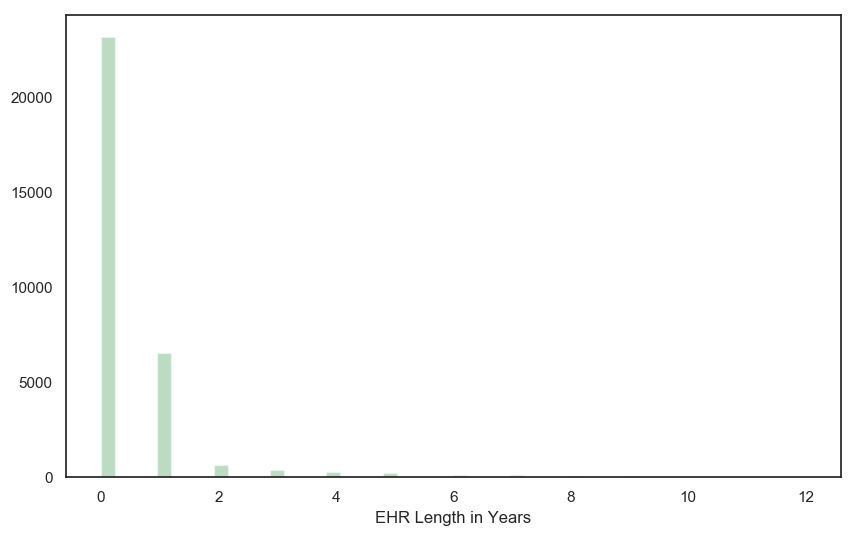

In [123]:
# We show this mainly to be sure that most patients have an EHR that spans less than 1 year 
sns.distplot(ehr_length, kde=False, axlabel='EHR Length in Years', color = 'g')
plt.show()

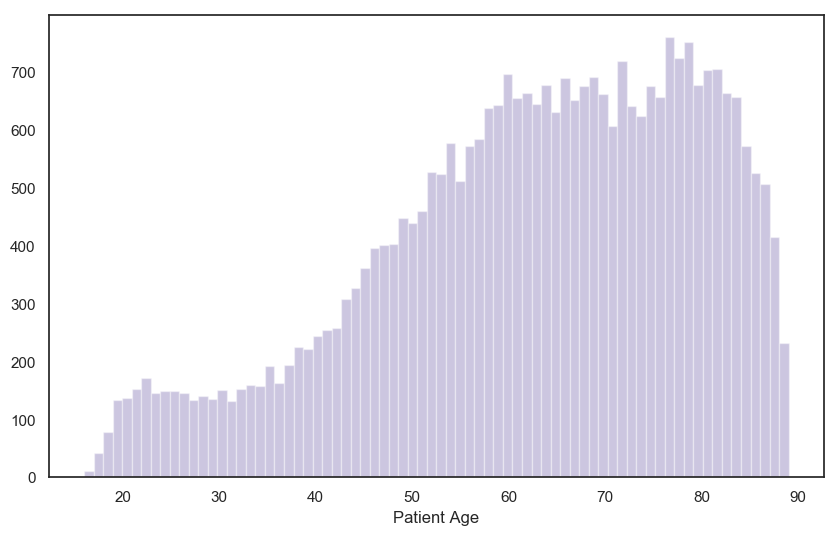

In [113]:
sns.distplot([np.round(x) for x in median_age], kde=False, bins=74, axlabel='Patient Age', color = 'm')
plt.show()

In [114]:
# Number of patients after/before cleaning
print(len(pt_notes['SUBJECT_ID'].unique()))
print(len(noteevents_original['SUBJECT_ID'].unique()))

31484
42681


In [115]:
# Document length after/before cleaning
print(np.average([len(str(x)) for x in pt_notes['TEXT']]))
print(np.average([len(str(x)) for x in noteevents_original['TEXT']]))

1414.5351104185797
1492.0938133622599


In [116]:
# Number of documents after/before cleaning
print(len(pt_notes))
print(len(noteevents_original))

646902
1148653


In [117]:
# Min number of documents per patient after/before cleaning
print(min(pt_notes['SUBJECT_ID'].value_counts().values))
print(min(noteevents_original['SUBJECT_ID'].value_counts().values))

2
2


In [118]:
# Max number of documents per patient after/before cleaning
print(max(pt_notes['SUBJECT_ID'].value_counts().values))
print(max(noteevents_original['SUBJECT_ID'].value_counts().values))

71
130
